Wholesale customers là dataset phục vụ cho bài toán customer segmentation dựa vào một số thông tin và hành vi của khách hàng 
- Đọc dữ liệu
- Trực quan hóa dữ liệu
- Chuẩn hóa dữ liệu 
- Dùng elbow method để chọn ra số clusters thích hợp (có thể chọn số clusters $\pm1$ để so sánh sự khác biệt)
- Biểu diễn các cụm sang không gian 2 chiều và 3 chiều
- Chọn ra một số data samples theo từng cụm để phân tích các giá trị trong đó 

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Determine the cluster number
    3. a. Use elbow method as baseline
    3. b. Apply other methods to compare with elbow
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable clustering model for this problem. 
5. Visualize your cluster in 2D or 3D to compare the result.
6. Measure performance of your clustering model.
7. Conclusion and Discussion (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

# Load Dataset

In [ ]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA #Khai báo thư viện PCA
import pickle
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Introduction to ML/Week 04/Clustered_Customer_Data.csv")

In [ ]:
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


# Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.describe()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,4474.500000,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318,1.442011
std,2583.786788,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331,1.373951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,2237.250000,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,0.000000
50%,4474.500000,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000,2.000000
75%,6711.750000,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000,3.000000
max,8949.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,3.000000


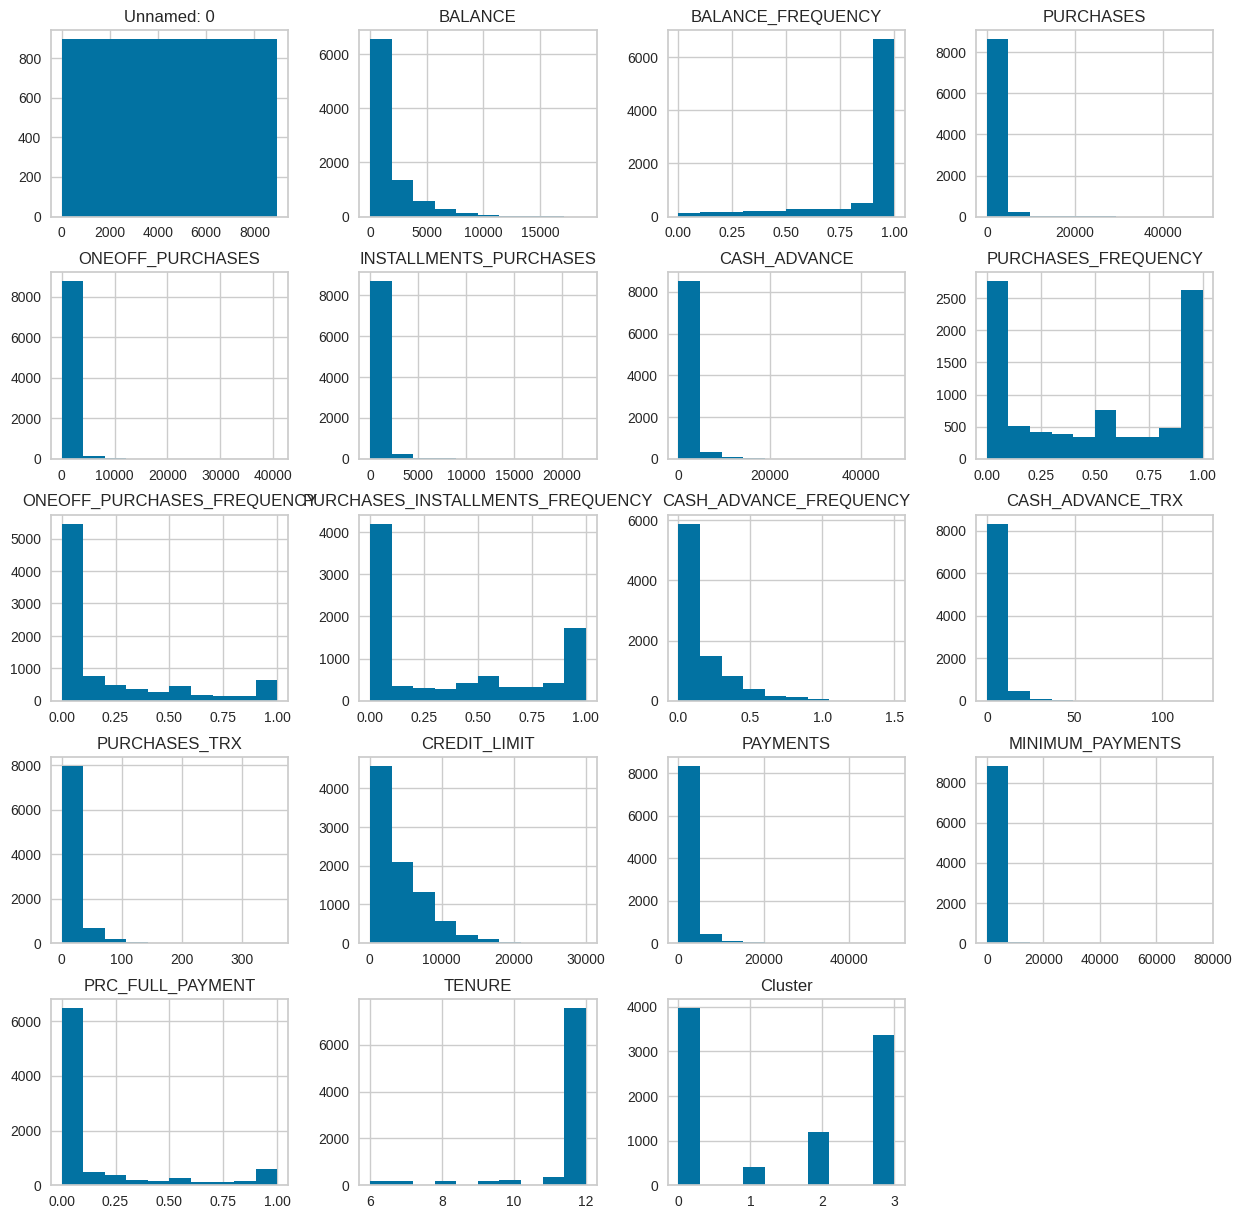

In [ ]:
df.hist(figsize=(15, 15))
plt.show()

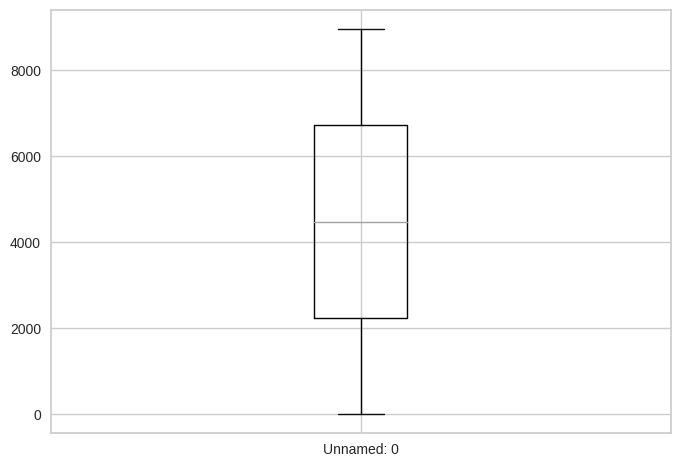

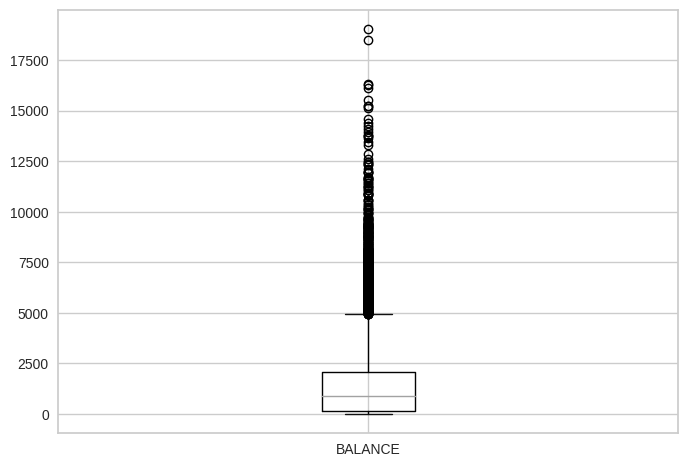

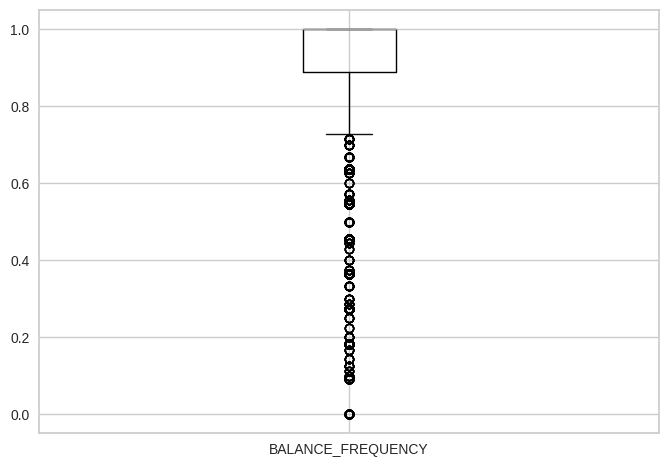

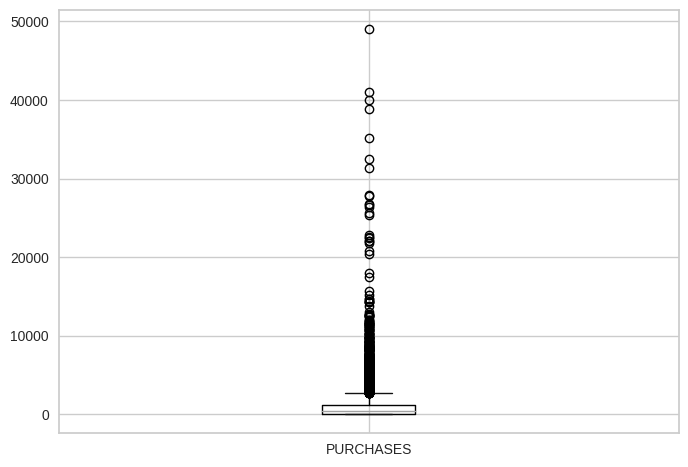

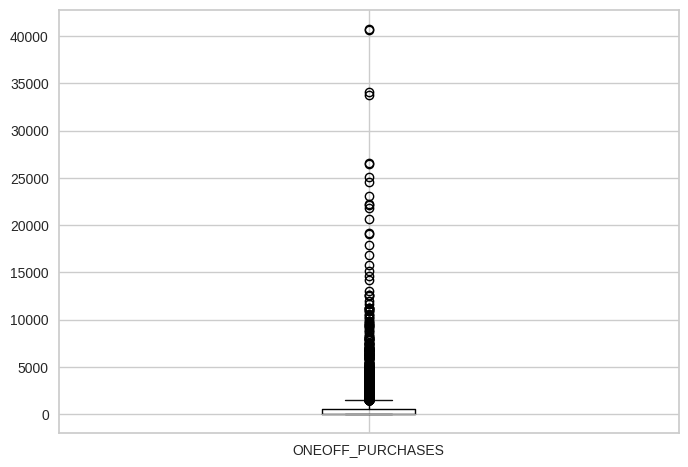

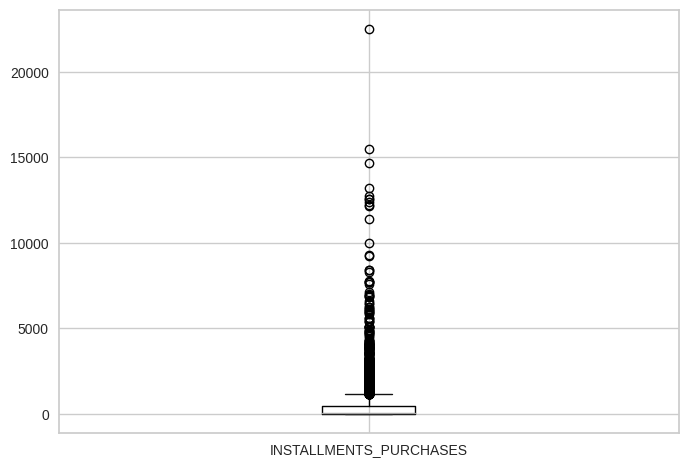

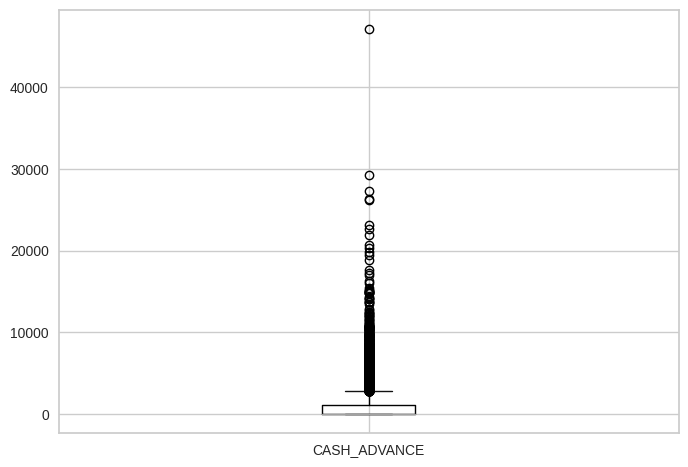

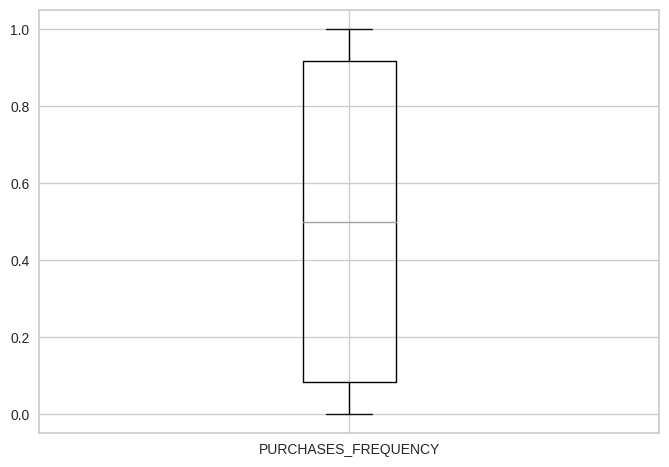

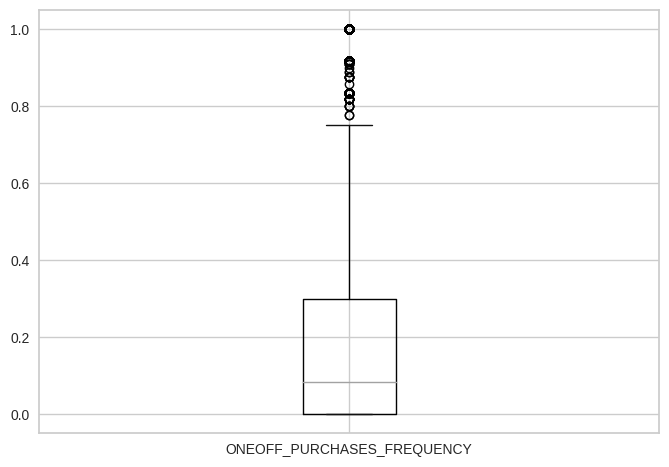

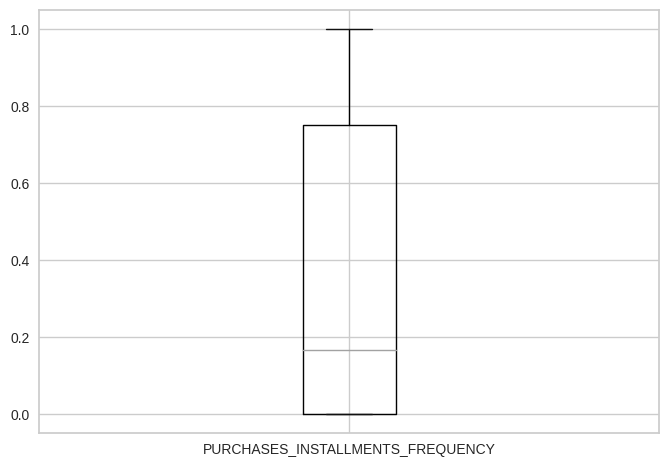

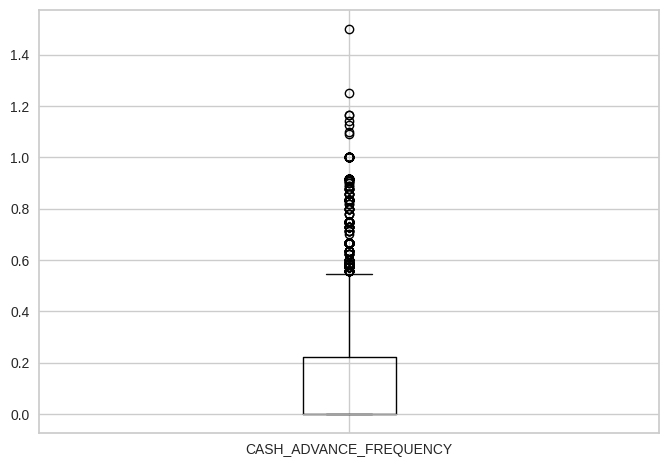

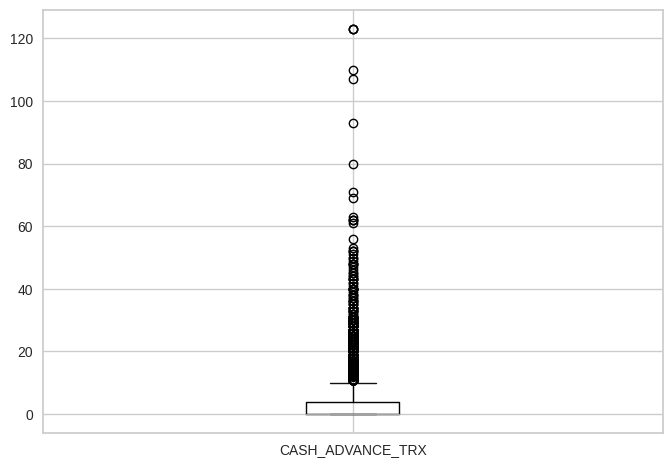

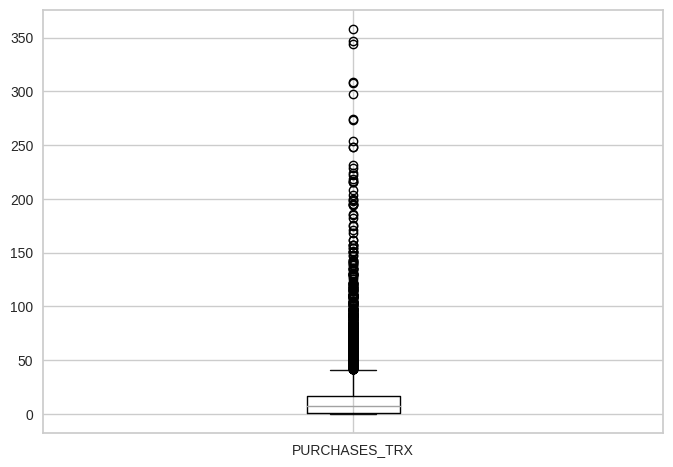

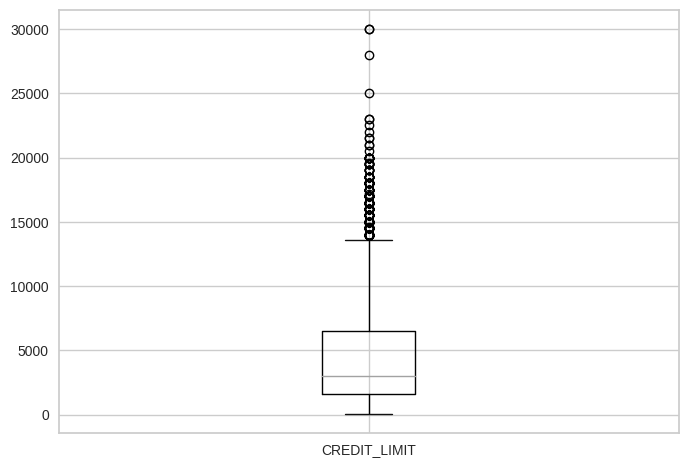

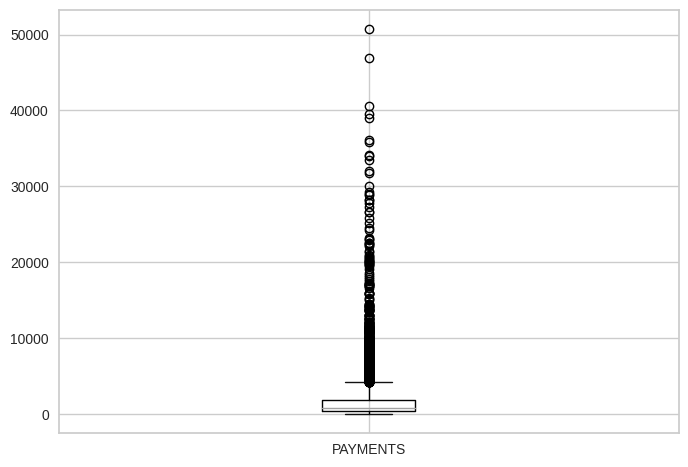

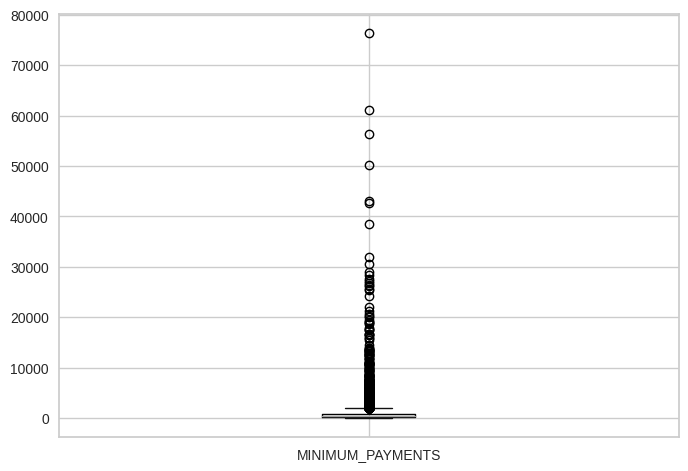

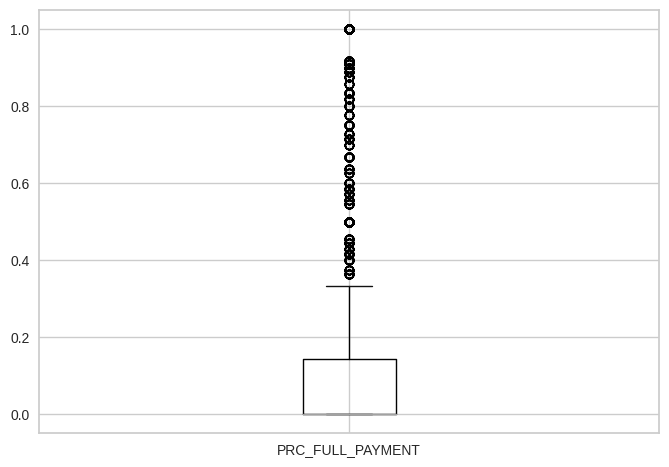

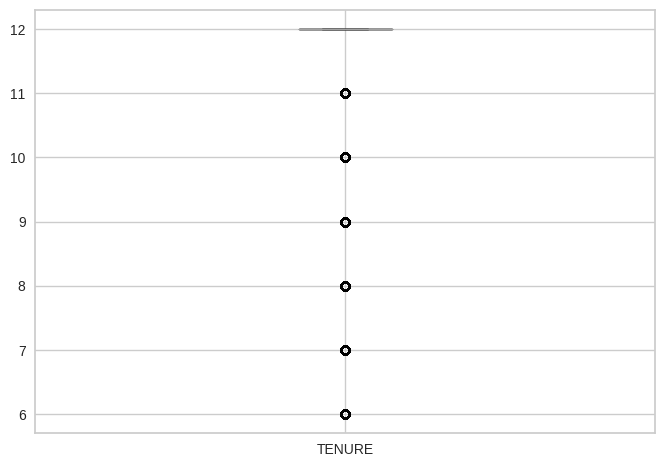

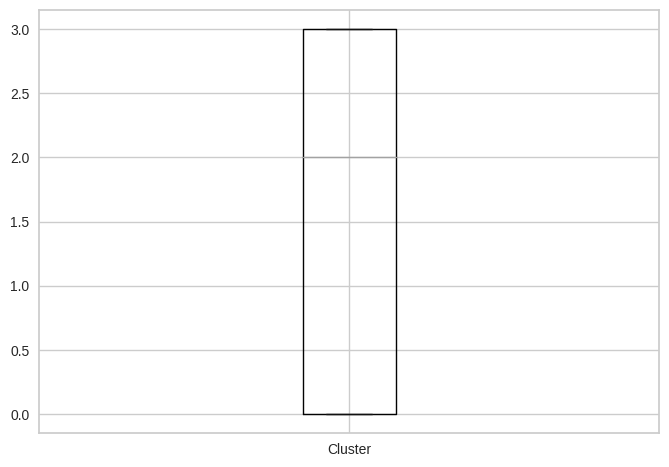

In [ ]:
for col in df:
  plt.figure()
  df.boxplot([col])

<Axes: >

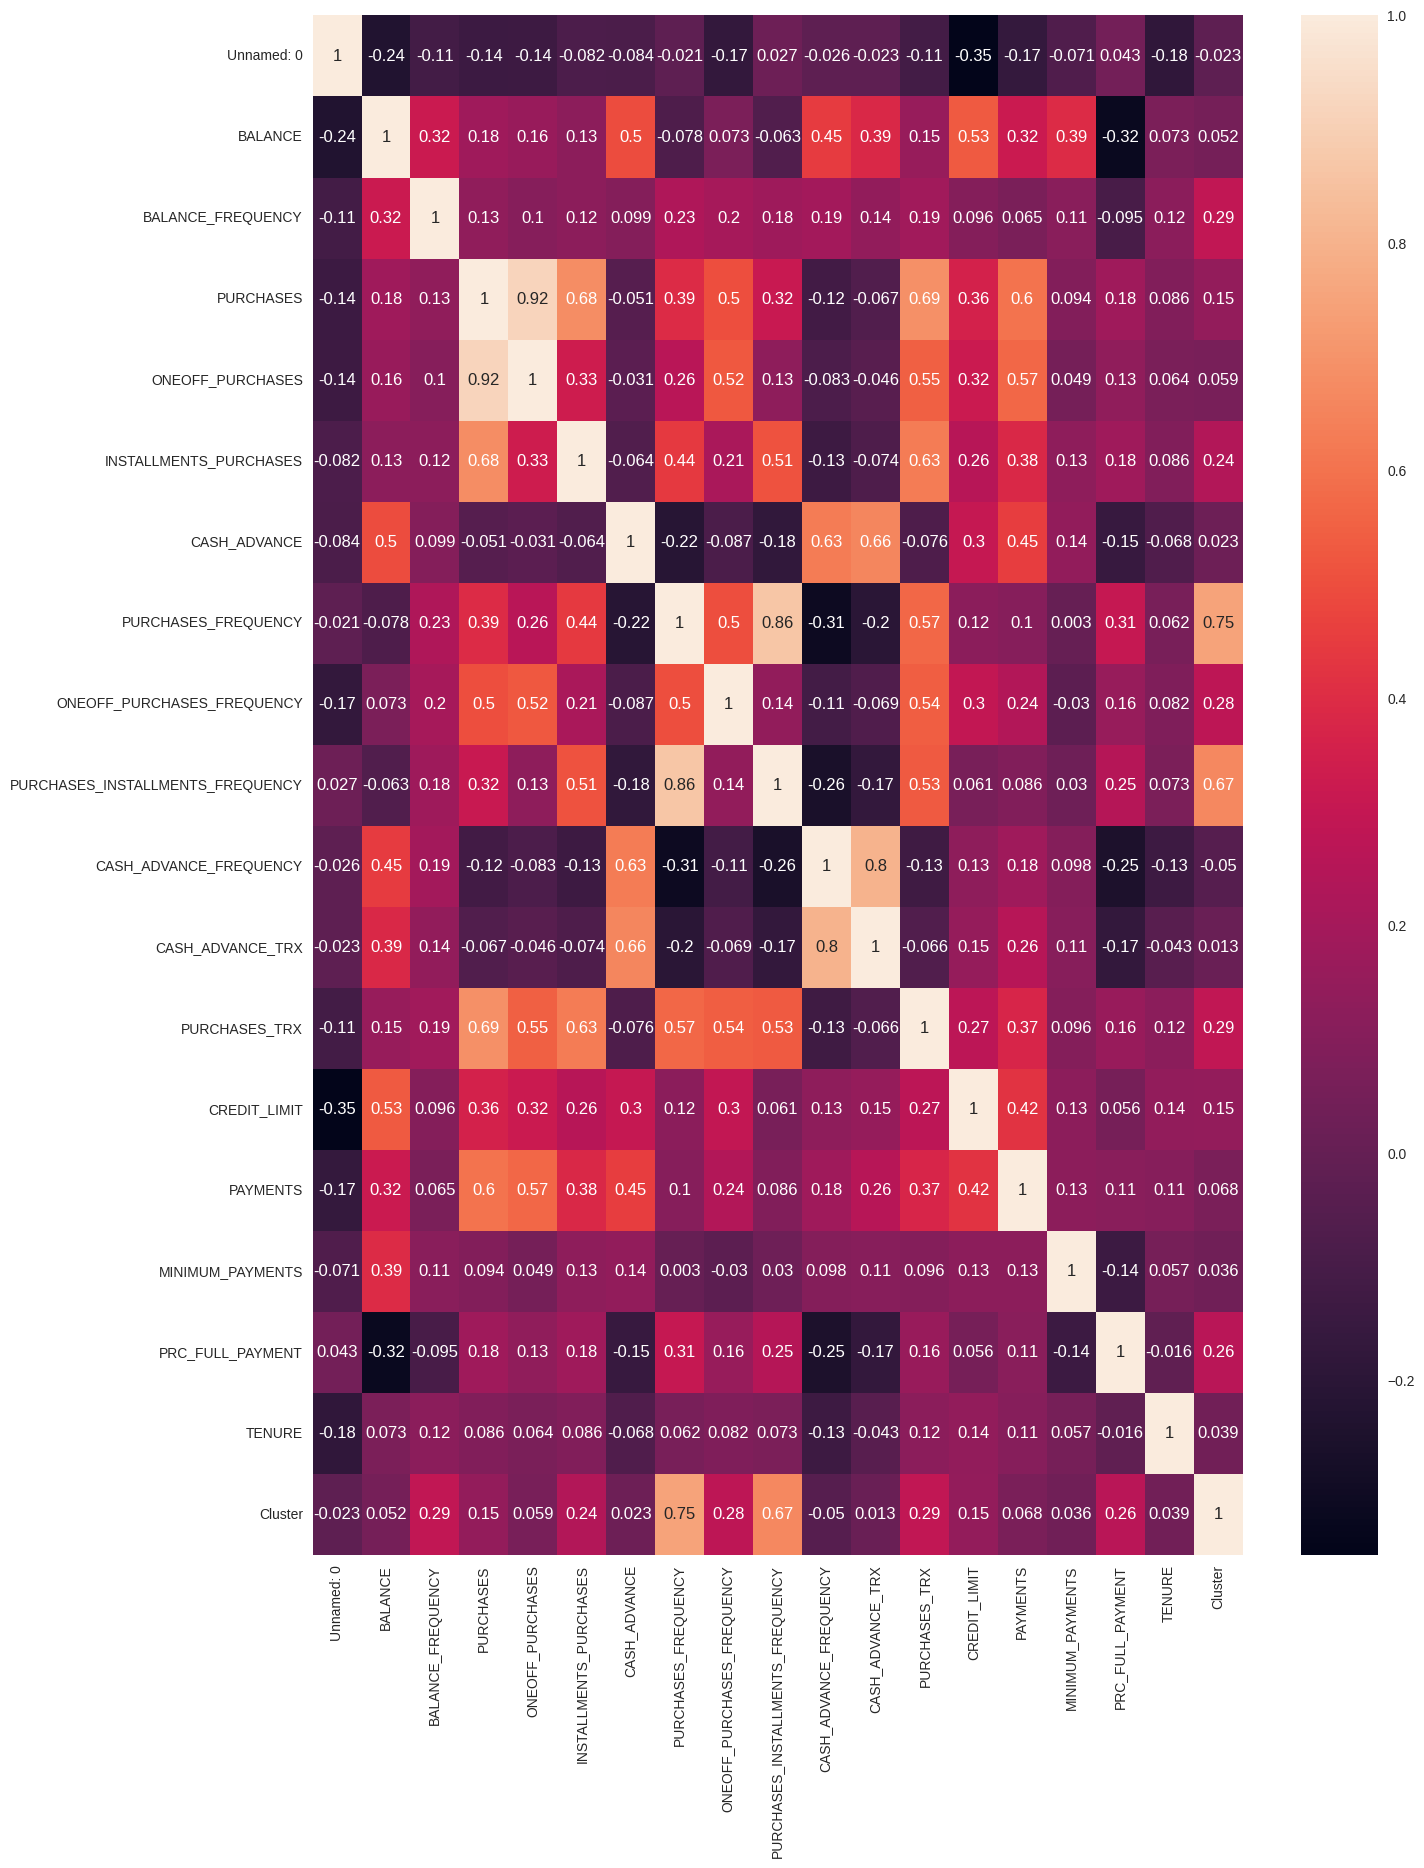

In [ ]:
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(), annot=True)

# Data Preprocessing

In [ ]:
df.isnull().sum()

Unnamed: 0                          0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Cluster                             0
dtype: int64

In [ ]:
#Find box plot
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin

def findBoxPlot(col: pd.Series, whisker_coeff: float=1.5) -> Tuple[float, float]:

  Q1 = col.quantile(0.25)
  Q3 = col.quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - whisker_coeff*IQR
  upper = Q3 + whisker_coeff*IQR
  return lower, upper

class boxPlotOutlierClipper(BaseEstimator, TransformerMixin):
  def __init__(self, whisker_coeff: float = 1.5):
     self.whisker = whisker_coeff
     self.lower = None
     self.upper = None

  def fit(self, X: pd.Series):
    self.lower, self.upper =  findBoxPlot(X,self.whisker)
    return self
  
  def transform(self, X):
    return X.clip(self.lower, self.upper)


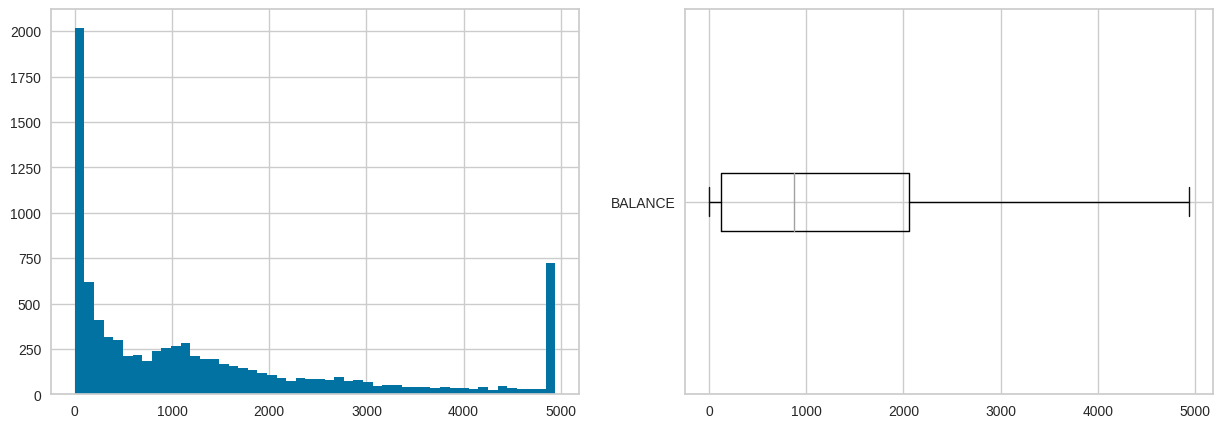

In [ ]:
balanceClipped = boxPlotOutlierClipper().fit_transform(df["BALANCE"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
balanceClipped.hist(bins=50, ax=axes[0])
balanceClipped.to_frame().boxplot(ax=axes[1], vert=False);

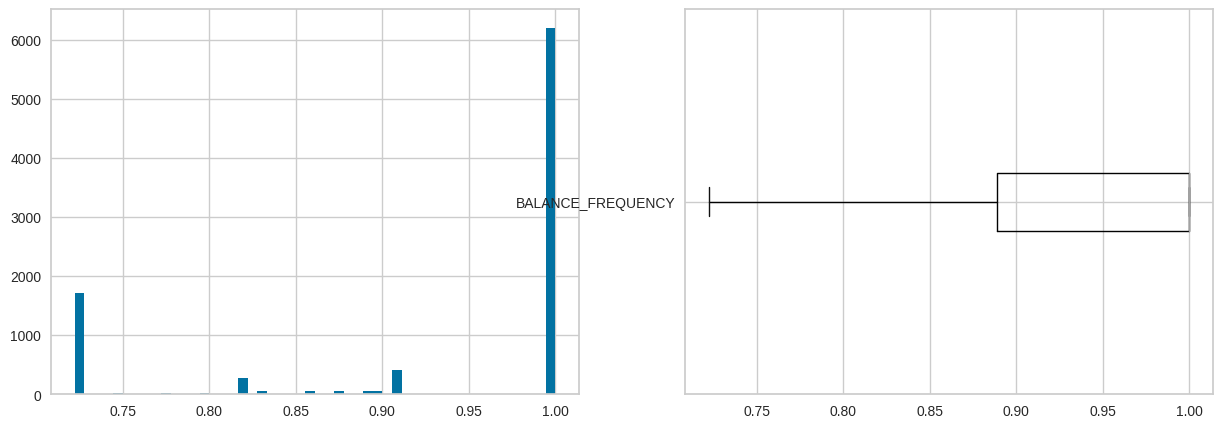

In [ ]:
balance_freq = boxPlotOutlierClipper().fit_transform(df["BALANCE_FREQUENCY"])
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
balance_freq.hist(bins=50, ax=axes[0])
balance_freq.to_frame().boxplot(ax=axes[1], vert=False);

In [ ]:
sampleCluster = df["Cluster"]

In [ ]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df.drop("Unnamed: 0", axis=1, inplace=True)
    df.drop("Cluster", axis=1, inplace=True)
    for col in df:
      df[col] = boxPlotOutlierClipper().fit_transform(df[col])
    
    return df

In [ ]:
df = preprocessing_data(df.copy())


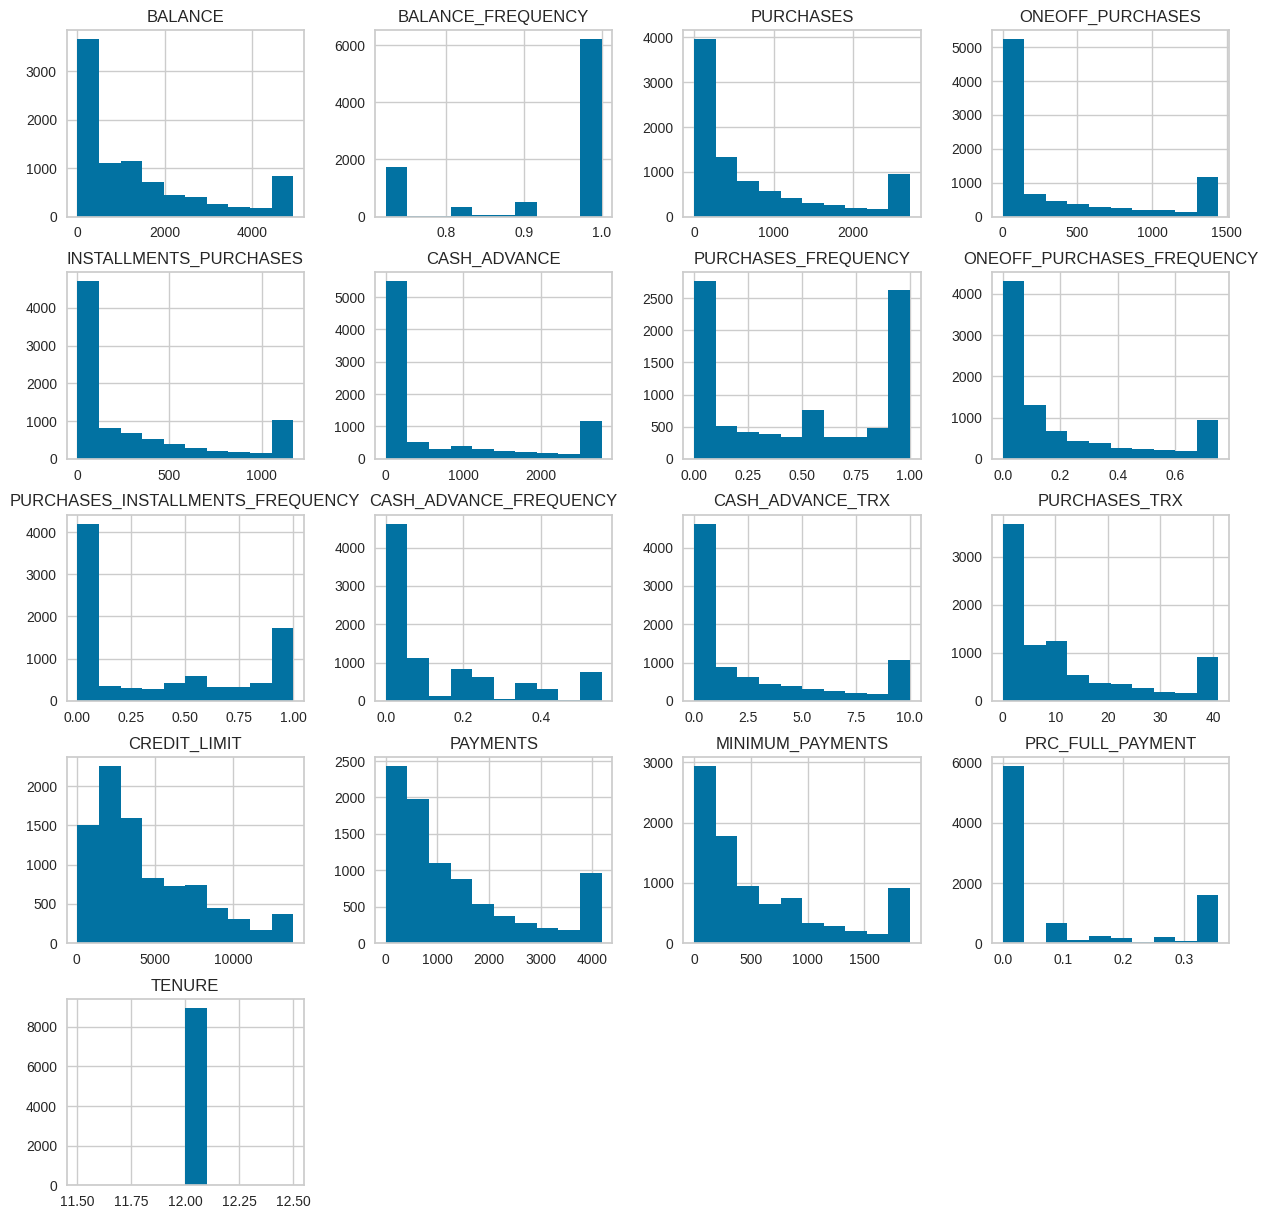

In [ ]:
df.hist(figsize=(15, 15))
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

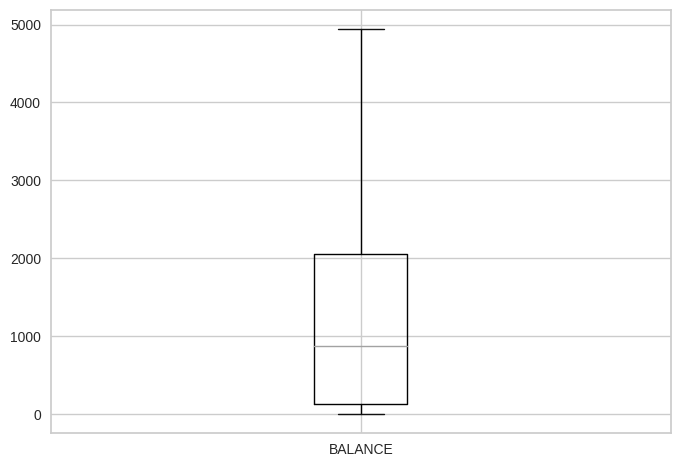

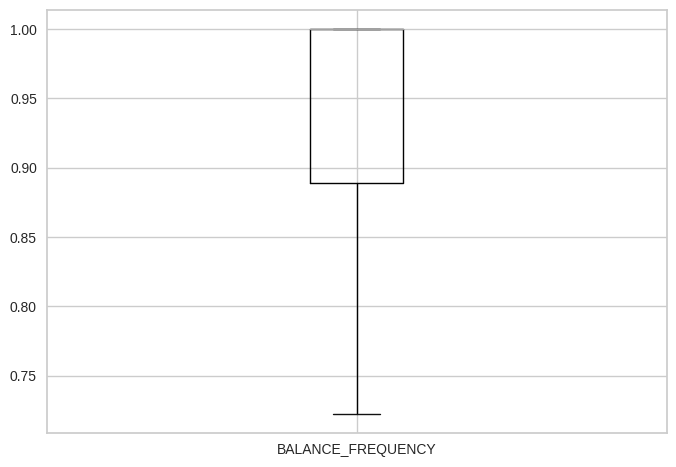

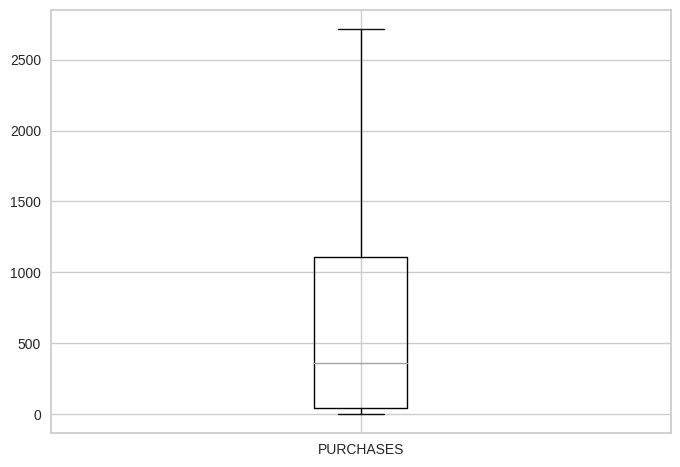

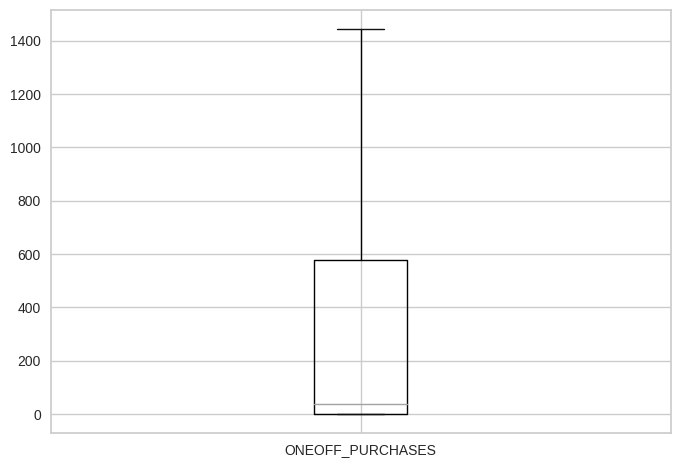

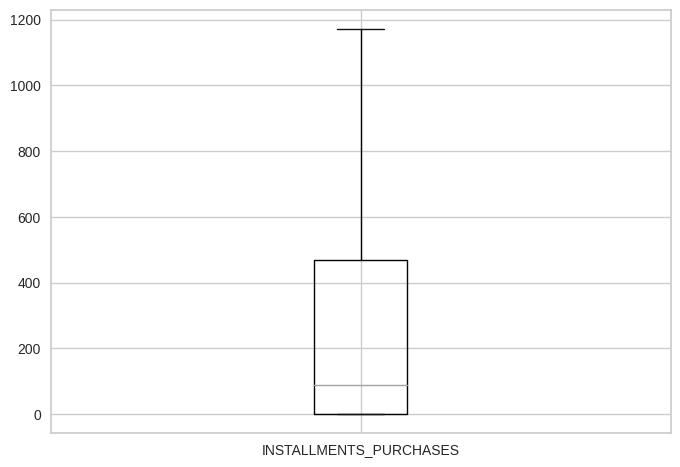

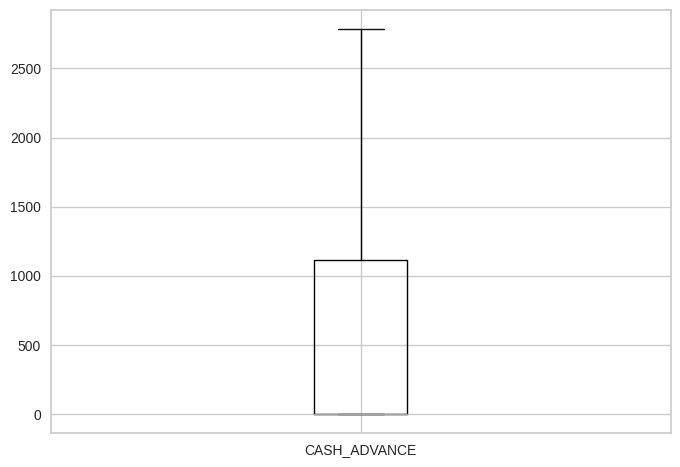

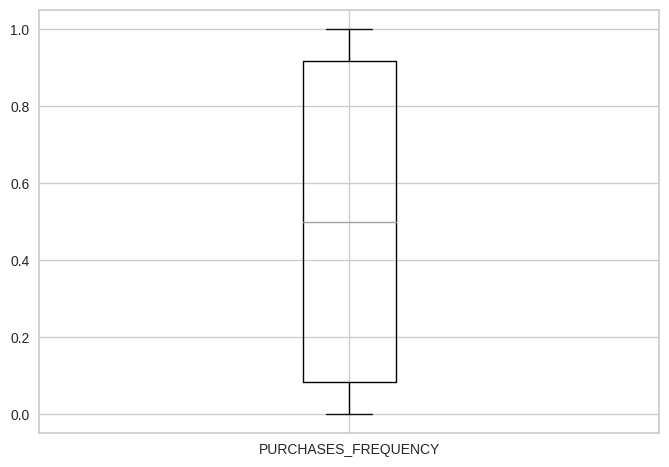

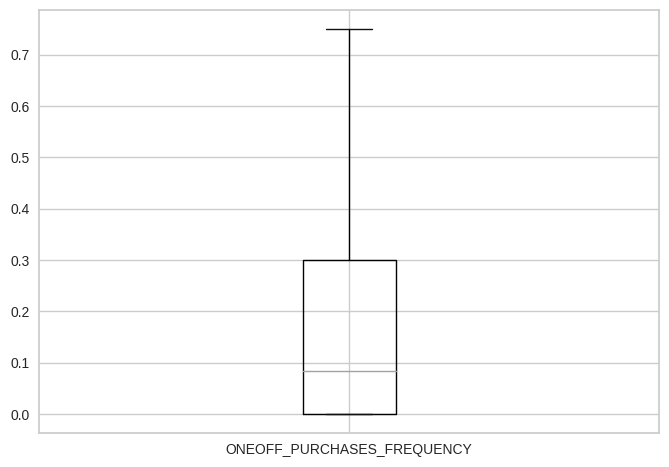

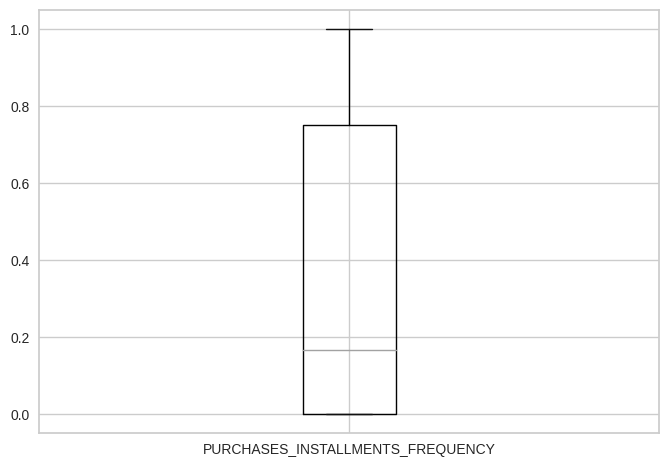

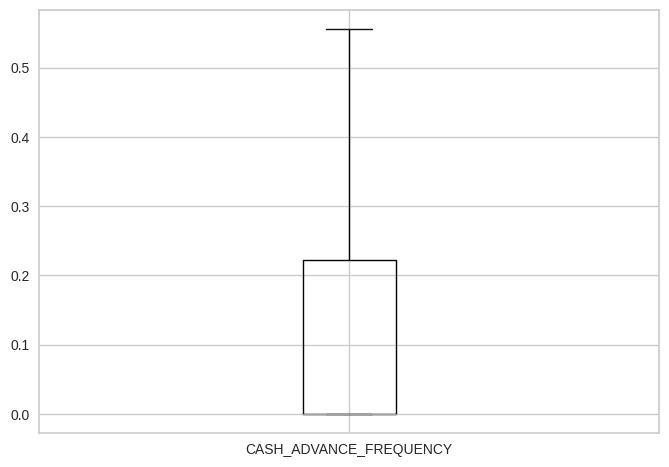

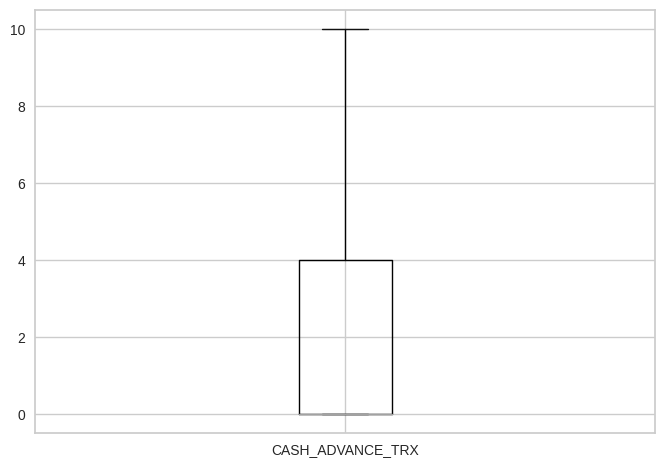

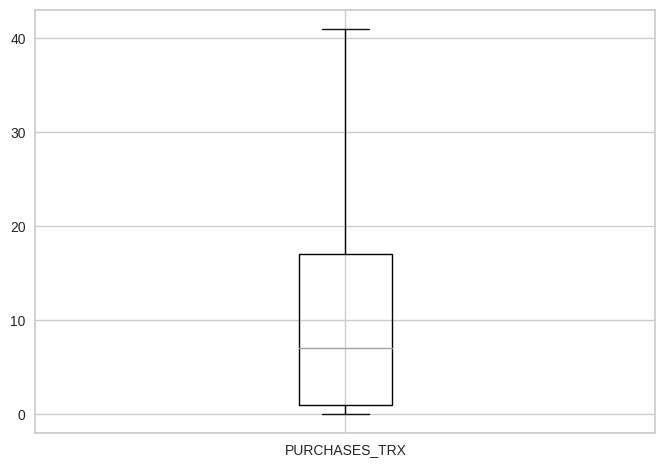

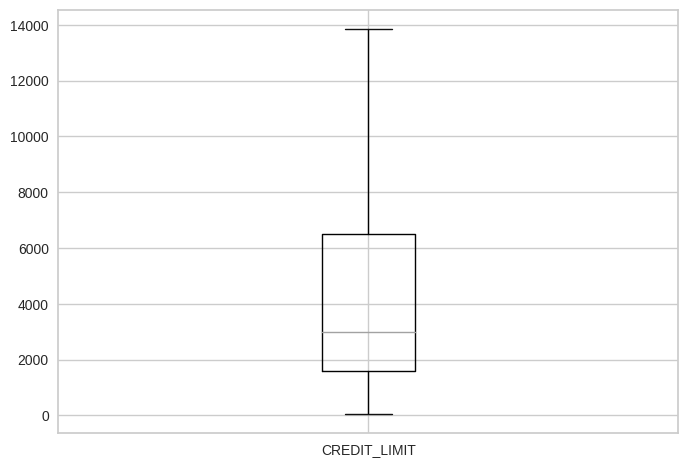

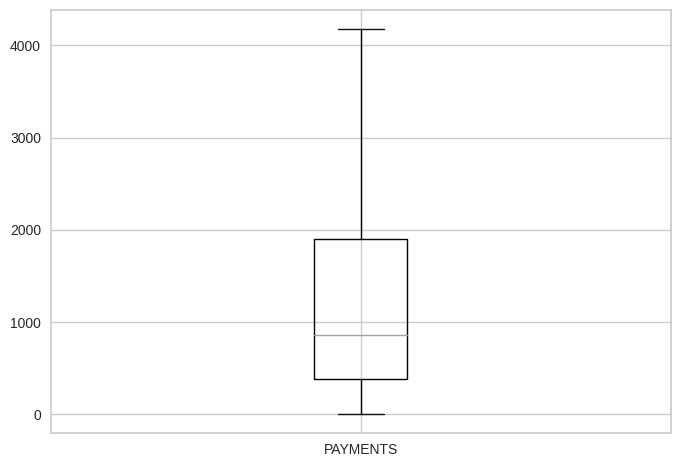

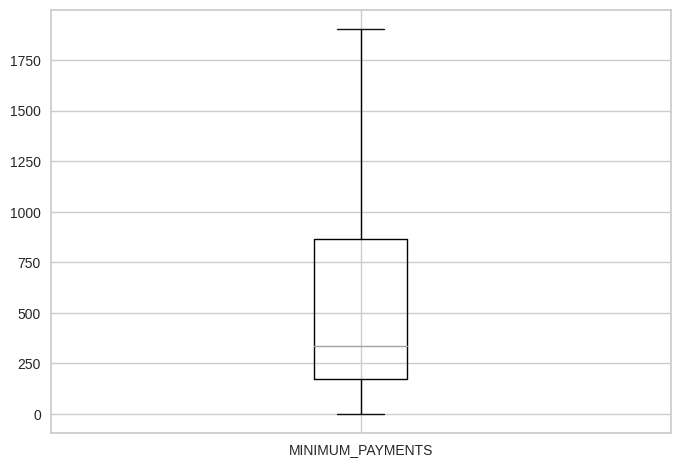

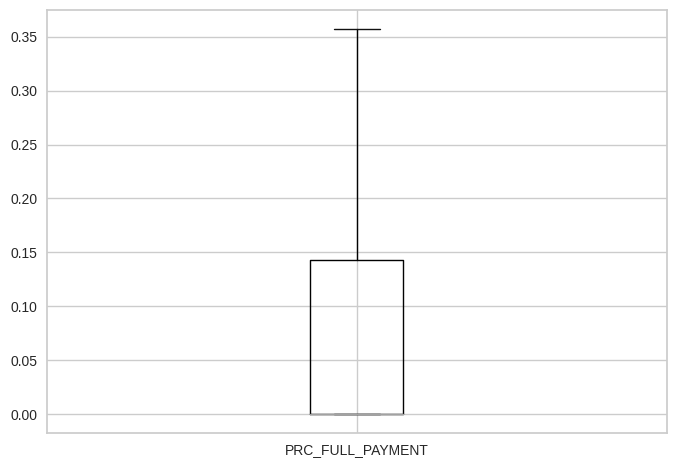

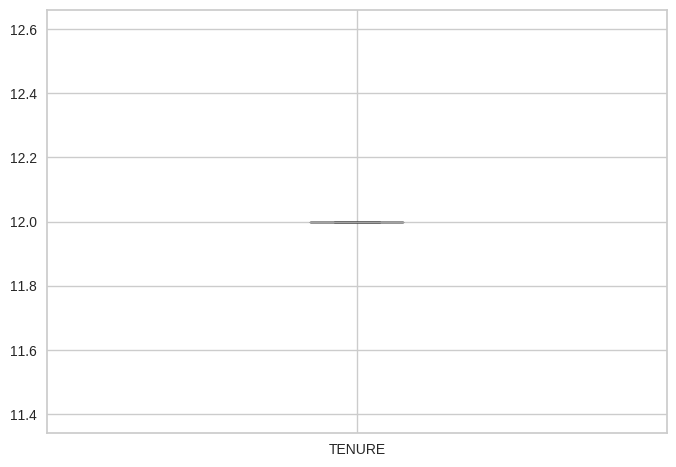

In [ ]:
for col in df:
  plt.figure()
  df.boxplot([col])

# Feature Engineering

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.values)

# Model Part

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

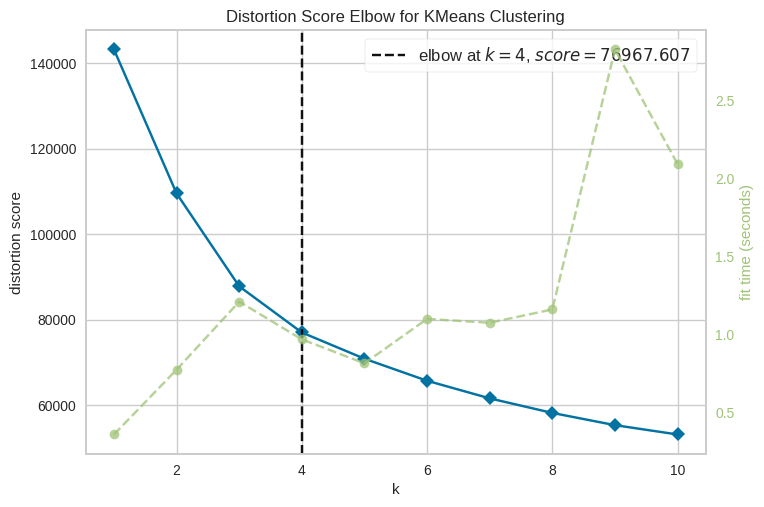

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
elbow_method = KElbowVisualizer(KMeans(), k=(1,11))
elbow_method.fit(scaled_data)
elbow_method.show()

In [ ]:
kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
kmeans_model.labels_

array([1, 2, 0, ..., 3, 1, 1], dtype=int32)

In [ ]:
kmeans_model.predict(scaled_data)

array([1, 2, 0, ..., 3, 1, 1], dtype=int32)

In [ ]:
kmeans_model.cluster_centers_

array([[ 0.30794977,  0.43320714,  1.68053998,  1.61217433,  0.98953662,
        -0.25104508,  1.02032474,  1.51563668,  0.6868972 , -0.29449719,
        -0.27621494,  1.51271043,  0.70333629,  0.93340196,  0.15732887,
         0.27152308,  0.        ],
       [-0.37022644, -0.3814294 , -0.54239922, -0.28860472, -0.63100023,
        -0.30553971, -0.74933265, -0.29121206, -0.72862274, -0.25104561,
        -0.3016731 , -0.6494013 , -0.3742469 , -0.4603553 , -0.31280103,
        -0.2883145 ,  0.        ],
       [ 1.10726028,  0.32421851, -0.51860534, -0.37424172, -0.49137038,
         1.48338916, -0.67441837, -0.37164131, -0.57595237,  1.44259134,
         1.49928451, -0.55720148,  0.47634018,  0.4720762 ,  0.86833739,
        -0.41703805,  0.        ],
       [-0.59034772, -0.02136673, -0.03461373, -0.48661599,  0.60609993,
        -0.57179866,  0.91343723, -0.41092528,  1.05576191, -0.58742843,
        -0.57154919,  0.28804466, -0.36487103, -0.40684519, -0.36447631,
         0.57446115

In [ ]:
#Use PCA
pca = PCA(n_components=len(df.columns)) #khai báo 
pca.fit(scaled_data)

PCA(n_components=17)

In [ ]:
pca.explained_variance_ratio_*100

array([33.36332894, 25.09900804,  9.63968351,  8.10497832,  6.13559685,
        4.23120201,  3.45585269,  2.79370273,  2.02270428,  1.38460199,
        1.16096974,  0.87631869,  0.81207425,  0.40614001,  0.33637614,
        0.17746181,  0.        ])

In [ ]:
pca = PCA(n_components=3) #dùng pca 3 thành phần
pca_df = pd.DataFrame(pca.fit_transform(scaled_data), columns=["pca_1", "pca_2", "pca_3"])#tạo ra dataframe với 3 thành phàn là pca1, pca2, và pca3

In [ ]:
pca_df

,pca_1,pca_2,pca_3
0,-1.637715,-2.423495,0.279856
1,-2.215350,2.245515,0.558382
2,1.168272,0.275078,1.572667
3,-0.523101,-0.209588,2.296522
4,-1.657319,-1.642660,0.250814
...,...,...,...
8945,0.671961,-2.533206,-1.504650
8946,0.207306,-1.605196,-1.966137
8947,-0.109551,-2.792296,-0.817294
8948,-2.075778,-2.292934,0.538074


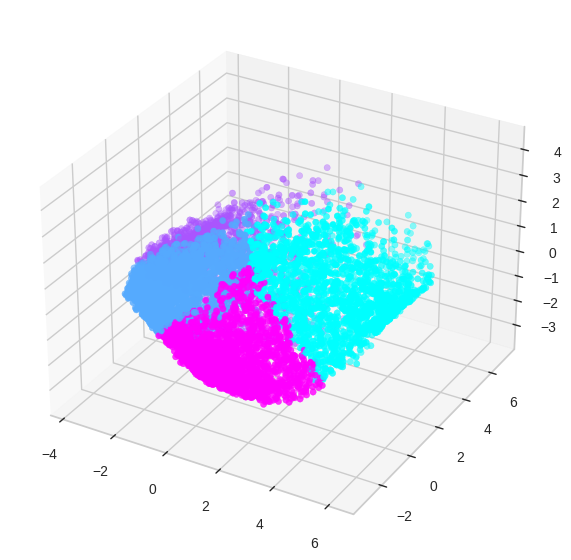

In [ ]:
#3-Dimensional PCA
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(pca_df.pca_1, pca_df.pca_2, pca_df.pca_3, c=kmeans_model.labels_, cmap="cool")
plt.show()

In [ ]:
#2D PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_df2D = pd.DataFrame(pca.transform(scaled_data), columns=["pca1", "pca2"])

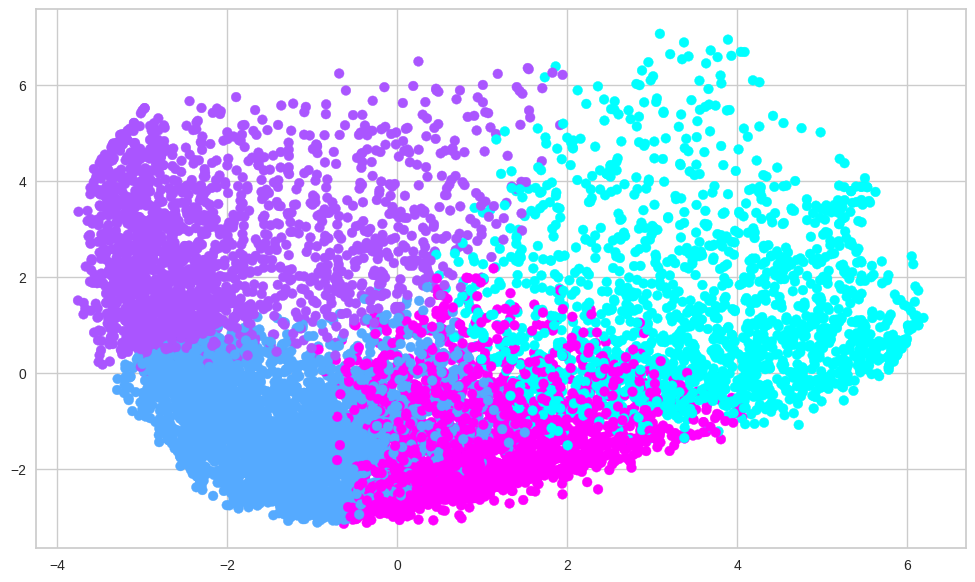

In [ ]:
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(pca_df2D.pca1, pca_df2D.pca2, c=kmeans_model.labels_, cmap="cool")
plt.show()

<ipython-input-32-74e34866ef6f>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(pca_df2D.iloc[index].pca1, pca_df2D.iloc[index].pca2, label=g, cmap="cool")


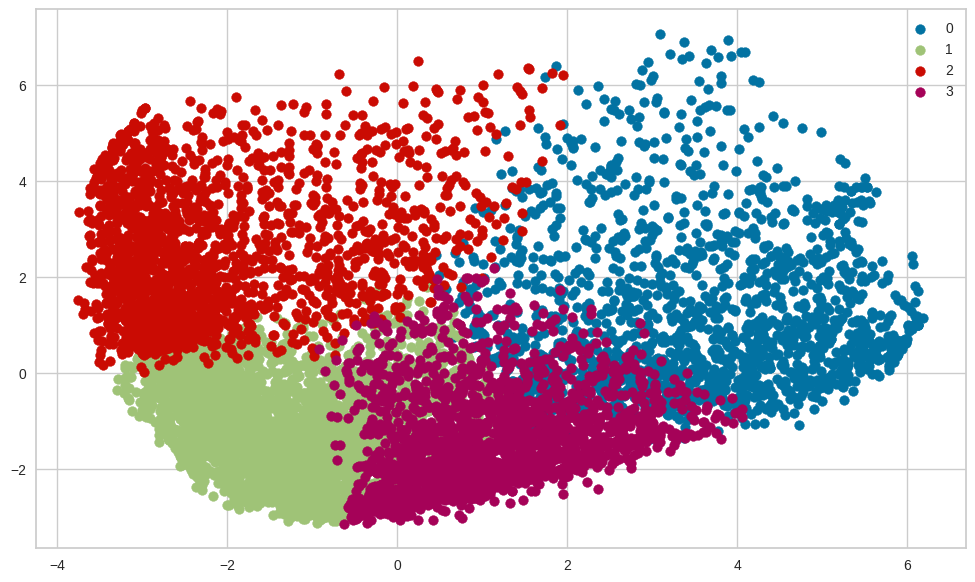

In [ ]:
plt.figure(figsize=(12, 7))
ax = plt.subplot()
group = kmeans_model.labels_
for g in np.unique(group):
    index = np.where(group==g)
    ax.scatter(pca_df2D.iloc[index].pca1, pca_df2D.iloc[index].pca2, label=g, cmap="cool")
ax.legend()
plt.show()

In [ ]:
file_name = "model.sav" #Tạo tên cũng như đường dẫn lưu model (nếu chỉ để tên model không thì sẽ lưu tại thư mục hiện hành)
pickle.dump(kmeans_model, open(file_name, "wb"))

In [ ]:
#Load model
file_name = "model.sav"
model = pickle.load(open(file_name, "rb"))

# Cluster Analysis

In [ ]:
cluster = kmeans_model.labels_
cluster1 = np.where(cluster==0)
cluster2 = np.where(cluster == 1)
cluster3 = np.where(cluster == 2)
cluster4 = np.where(cluster == 3)

In [ ]:
df.iloc[cluster1]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2,2495.148862,1.000000,773.1700,773.1700,0.00000,0.000000,1.000000,0.750000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
6,627.260806,1.000000,2715.8725,1443.5125,688.38000,0.000000,1.000000,0.750000,1.000000,0.000000,0,41,13500.0,4177.921543,198.065894,0.357143,12
12,1516.928620,1.000000,2715.8725,1443.5125,717.76000,0.000000,1.000000,0.250000,0.916667,0.000000,0,26,3000.0,608.263689,490.207013,0.250000,12
13,921.693369,1.000000,2137.9300,419.9600,1171.59375,0.000000,0.750000,0.166667,0.750000,0.000000,0,26,7500.0,1655.891435,251.137986,0.083333,12
21,4942.927215,1.000000,2715.8725,1443.5125,449.91000,229.028245,1.000000,0.750000,1.000000,0.333333,6,41,11250.0,2077.959051,1659.775075,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,1812.542545,0.857143,2715.8725,1443.5125,0.00000,0.000000,0.571429,0.571429,0.000000,0.000000,0,5,3000.0,247.249275,297.395431,0.000000,12
8801,275.020950,1.000000,1943.0000,1443.5125,0.00000,0.000000,0.600000,0.600000,0.000000,0.000000,0,9,500.0,1438.120632,142.241273,0.357143,12
8856,227.220411,1.000000,1387.6000,288.5400,1099.06000,107.660394,1.000000,0.750000,0.875000,0.125000,1,41,1000.0,1217.473837,136.283049,0.142857,12
8897,328.686581,1.000000,2715.8725,1443.5125,218.25000,0.000000,0.857143,0.714286,0.285714,0.000000,0,26,1200.0,1796.886852,93.017466,0.250000,12


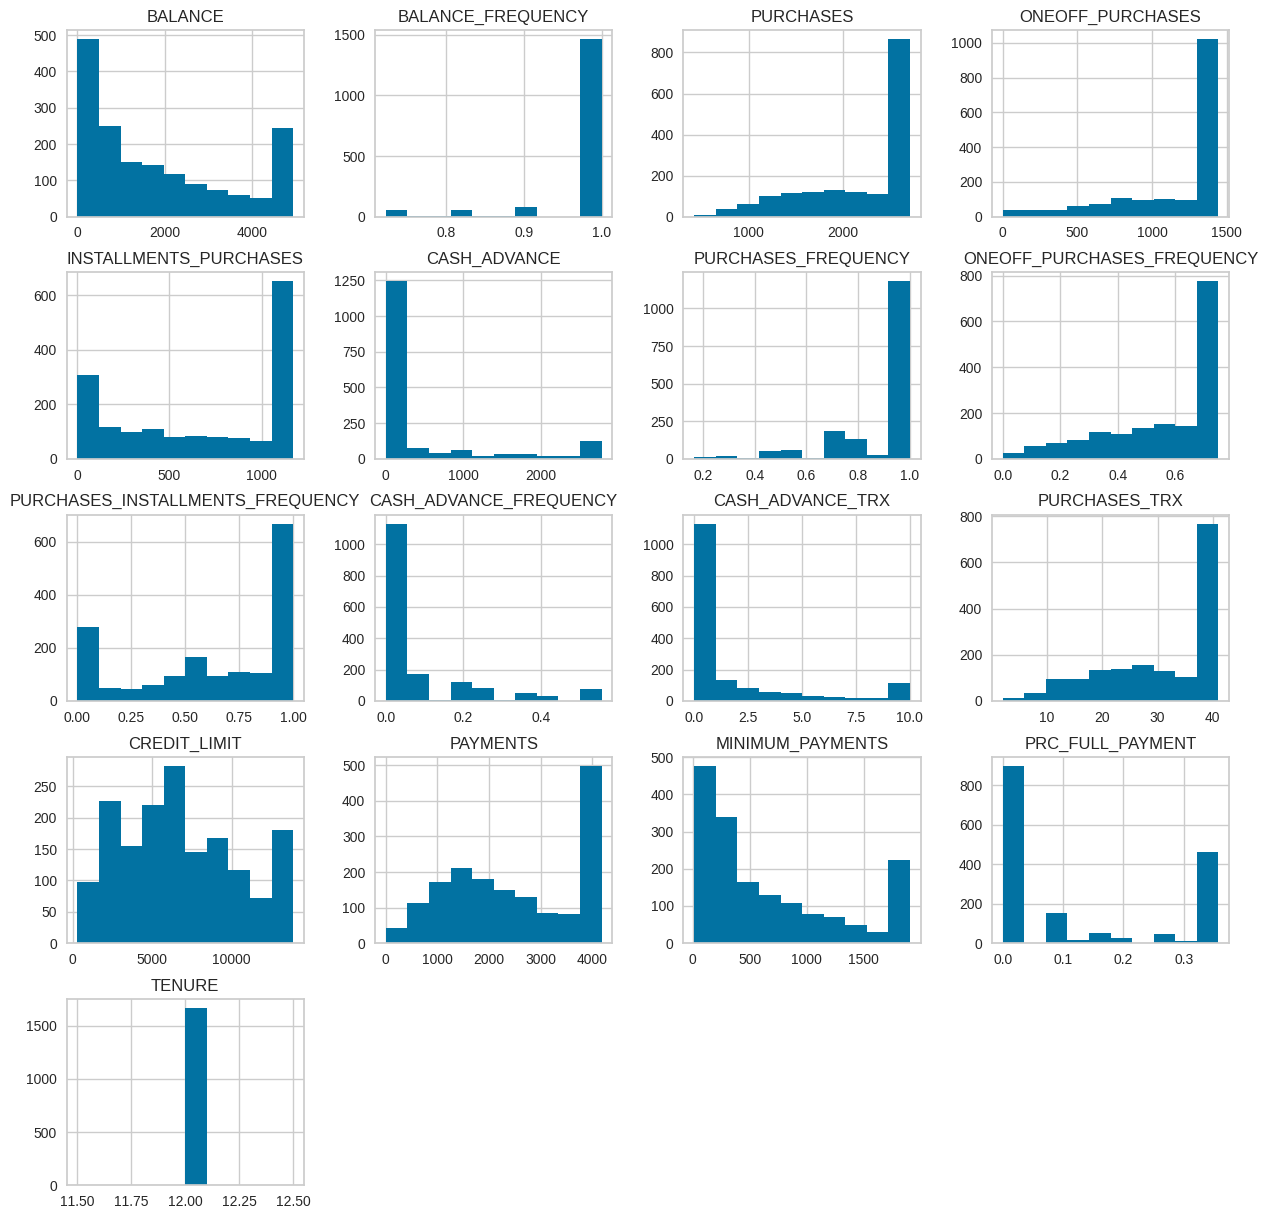

In [ ]:
dataCluster1 = df.iloc[cluster1]

dataCluster1.hist(figsize=(15,15))
plt.show()

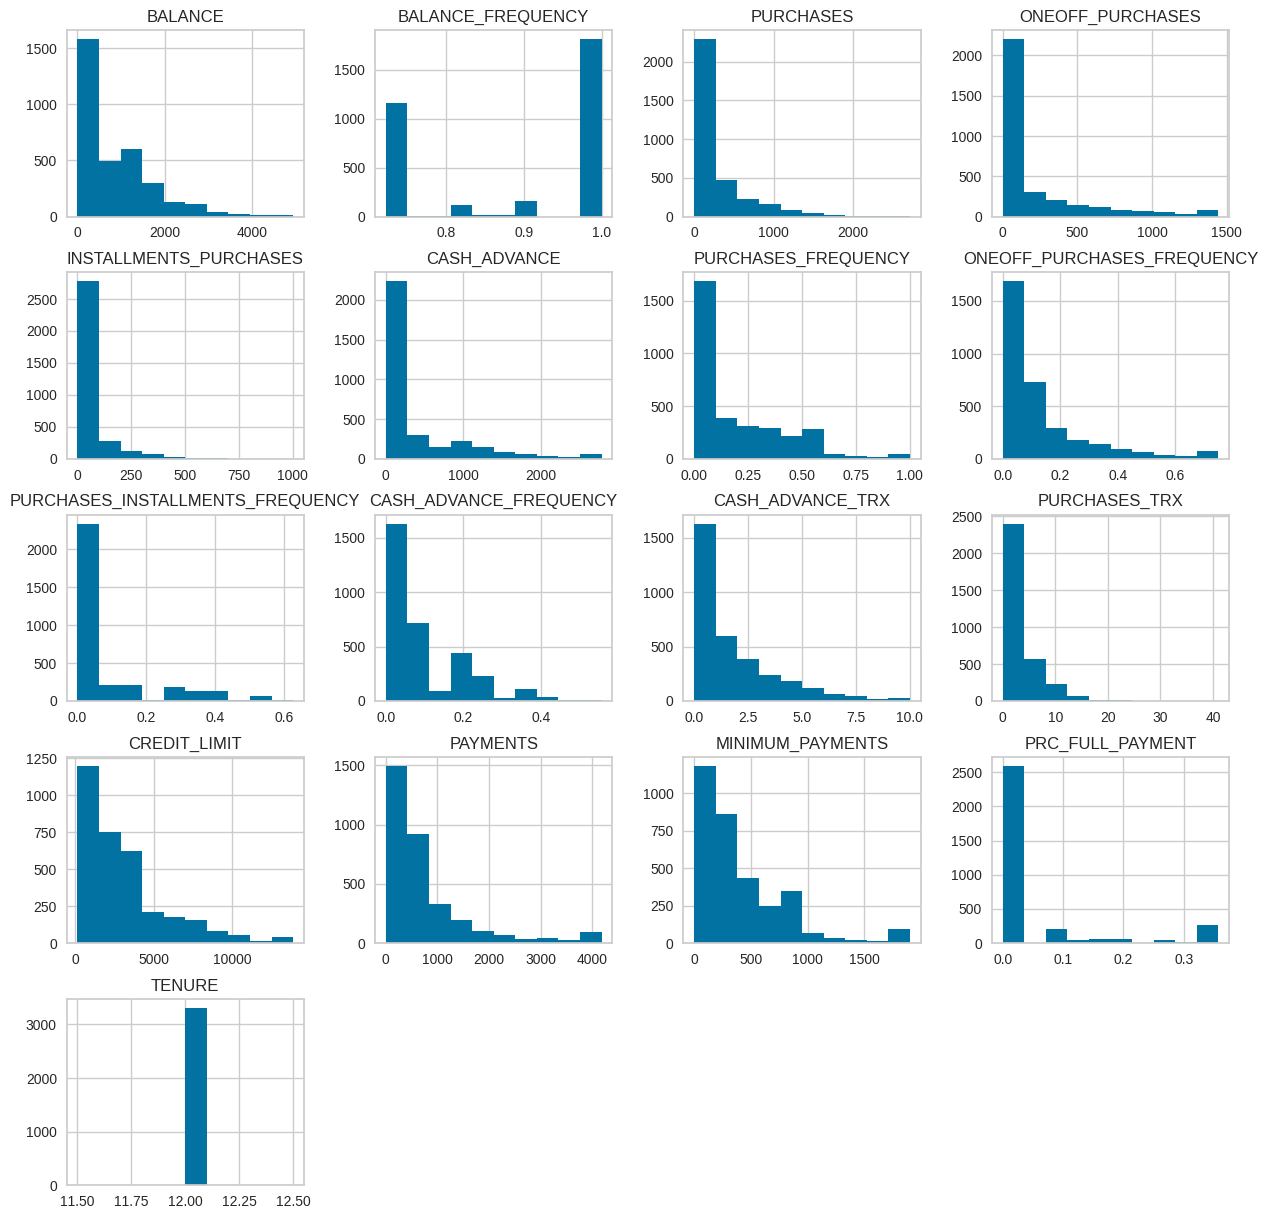

In [ ]:
dataCluster2 = df.iloc[cluster2]

dataCluster2.hist(figsize=(15,15))
plt.show()

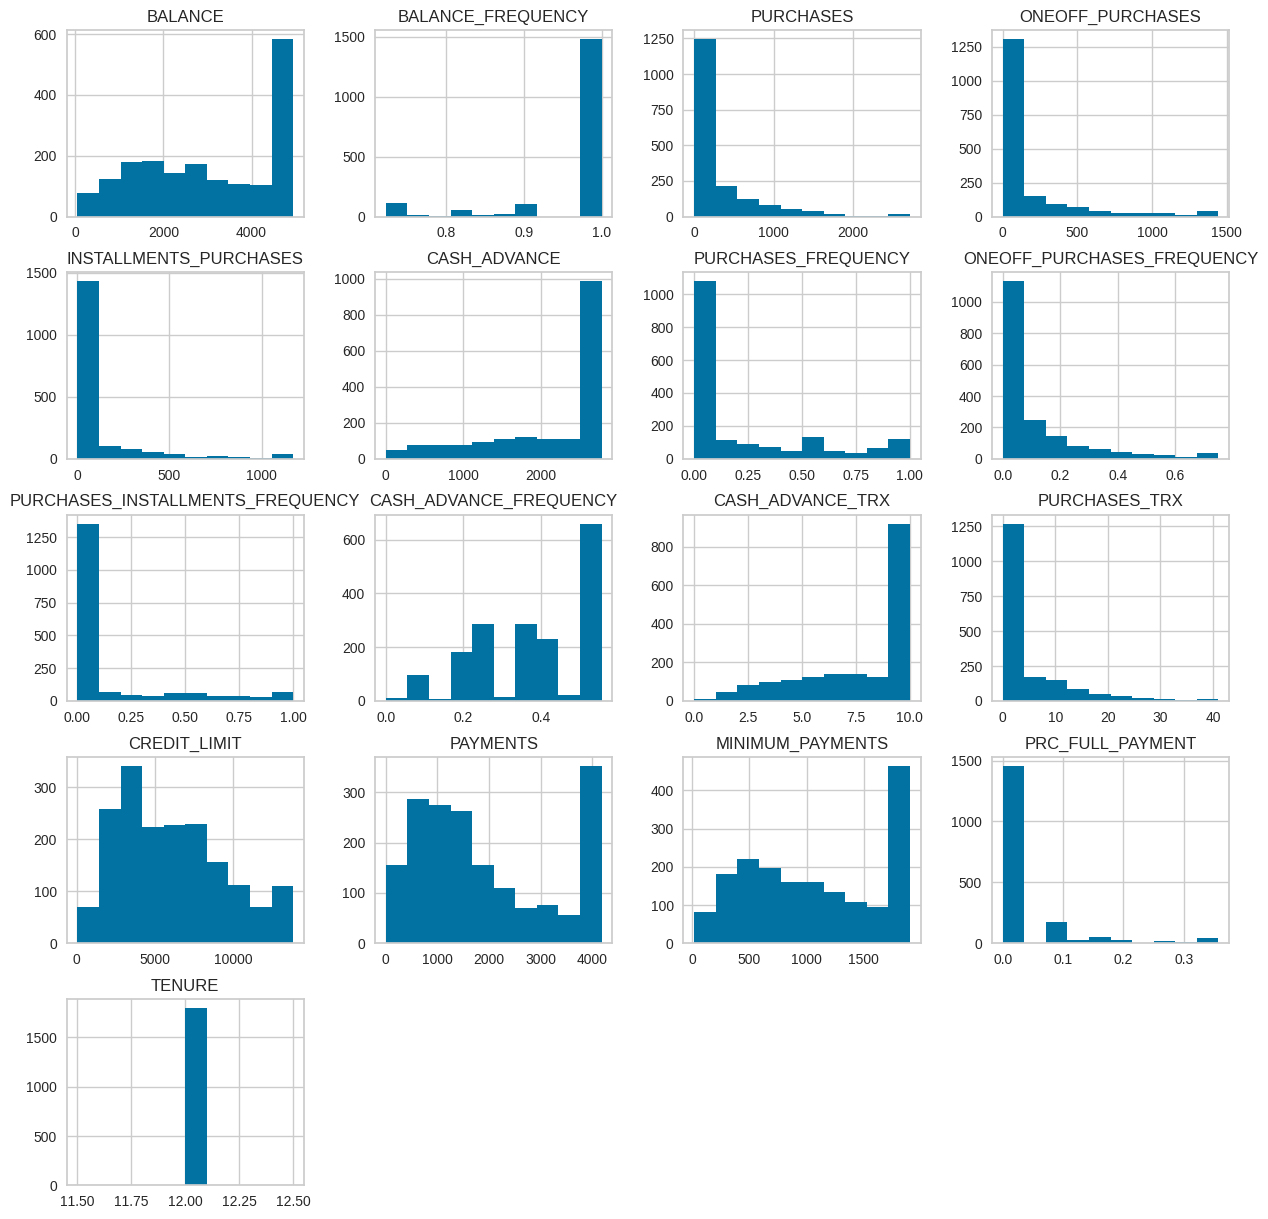

In [ ]:
dataCluster3 = df.iloc[cluster3]

dataCluster3.hist(figsize=(15,15))
plt.show()

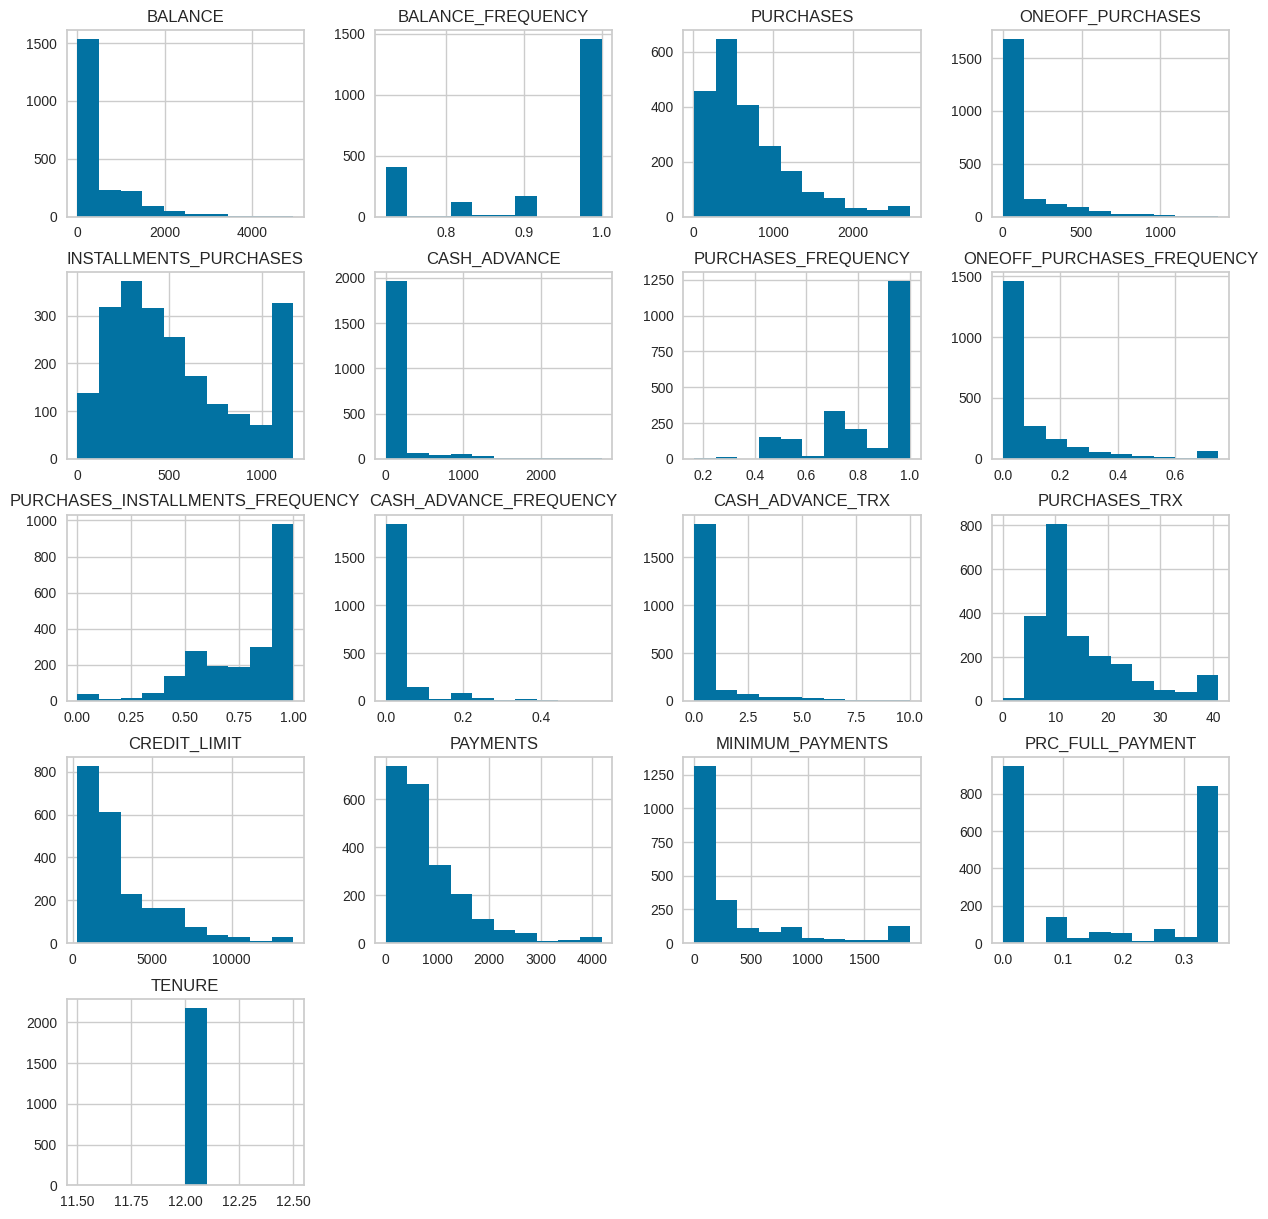

In [ ]:
dataCluster4 = df.iloc[cluster4]

dataCluster4.hist(figsize=(15,15))
plt.show()

# Discussion & Conclusion

## Showing the graph with the sample cluster in the dataset and with 3 and 5 clusters

<ipython-input-42-22d22d10d117>:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(pca_df2D.iloc[index].pca1, pca_df2D.iloc[index].pca2, label=g, cmap="cool")


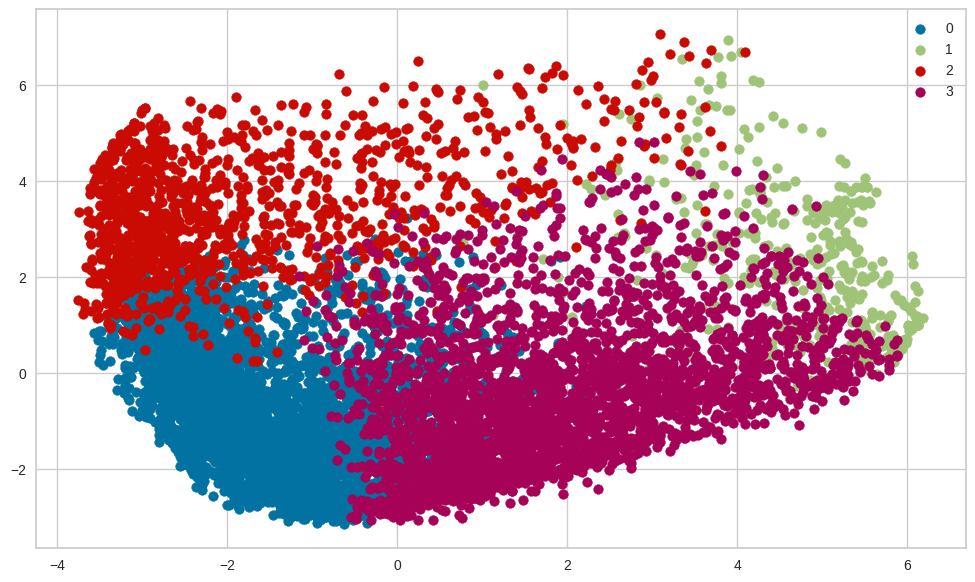

In [ ]:
#Try to show the sample cluster

#sampleCluster = df["Cluster"]
plt.figure(figsize=(12,7))
ax = plt.subplot()
group = sampleCluster

for g in np.unique(group):
  index = np.where(group == g)
  ax.scatter(pca_df2D.iloc[index].pca1, pca_df2D.iloc[index].pca2, label=g, cmap="cool")
ax.legend()
plt.show()

In [ ]:
#Try to implement Kmeans Clustering with 5 clusters and 3 clusters
kmeans_model5 = KMeans(n_clusters=5)
kmeans_model5.fit(scaled_data)

kmeans_model3 = KMeans(n_clusters=3)
kmeans_model3.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

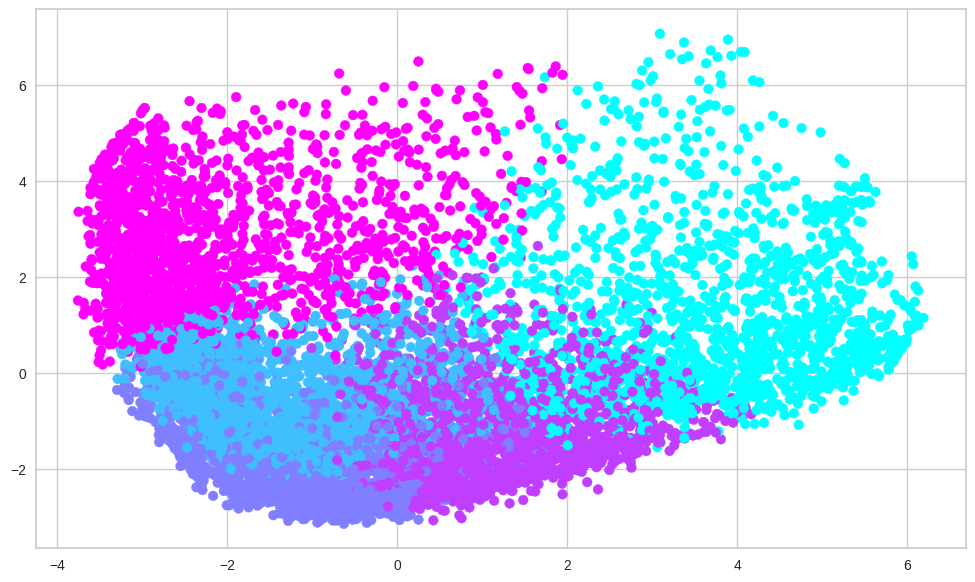

In [ ]:
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(pca_df2D.pca1, pca_df2D.pca2, c=kmeans_model5.labels_, cmap="cool")
plt.show()

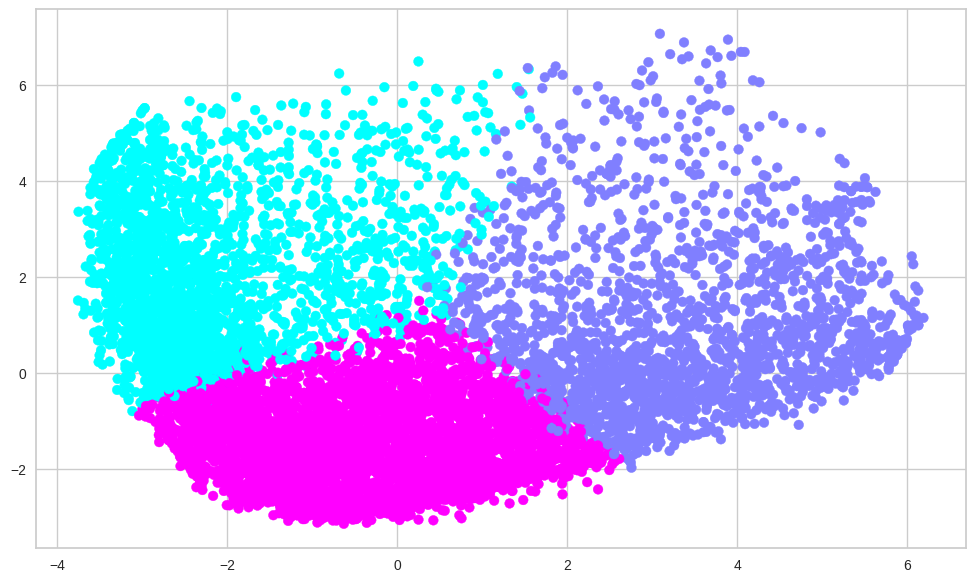

In [ ]:
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(pca_df2D.pca1, pca_df2D.pca2, c=kmeans_model3.labels_, cmap="cool")
plt.show()

In [ ]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "Kmeans Clustering gives a relatively good result, with using the Elbow method to find the best number of clusters to fit the data."\
           "Since the 4 clusters means that we have the 4 categories of customers' behaviours."

In [ ]:
get_conclusion()

"Kmeans Clustering gives a relatively good result, with using the Elbow method to find the best number of clusters to fit the data.Since the 4 clusters means that we have the 4 categories of customers' behaviours."